<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/14_Movie_reviews_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imdb Movie Sentiment Analysis**


In [15]:
# data processing and visualization libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
# Keras deep learning model libraries
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization , Conv1D ,MaxPool2D , MaxPool1D 
from tensorflow.keras.optimizers import SGD ,Adam
# data validation lib
from sklearn.model_selection import KFold

In [ ]:
# p='https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv'

In [8]:
# import datasets
from keras.datasets import imdb 

In [9]:
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [12]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X.shape, y.shape

((50000,), (50000,))

In [13]:
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


In [14]:
in_arr1 = np.array([[ 1, 2, 3], [ -1, -2, -3]]) # 2, 3 array
print ("1st Input array : \n", in_arr1) 
  
in_arr2 = np.array([[ 22, 23, 24], [ 25, 26, 27]] )
print ("2nd Input array : \n", in_arr2) 
  
# Stacking the two arrays horizontally
out_arr = np.hstack((in_arr1, in_arr2))
print ("Output horizontally stacked array:\n ", out_arr)

1st Input array : 
 [[ 1  2  3]
 [-1 -2 -3]]
2nd Input array : 
 [[22 23 24]
 [25 26 27]]
Output horizontally stacked array:
  [[ 1  2  3 22 23 24]
 [-1 -2 -3 25 26 27]]


In [15]:
# Stacking the two arrays horizontally
out_arr = np.vstack((in_arr1, in_arr2))
print ("Output vertically stacked array:\n ", out_arr)

Output vertically stacked array:
  [[ 1  2  3]
 [-1 -2 -3]
 [22 23 24]
 [25 26 27]]


In [ ]:
in_arr1 = np.array([ 1, 2, 3] )
print ("1st Input array : \n", in_arr1) 
  
in_arr2 = np.array([ 4, 5, 6] )
print ("2nd Input array : \n", in_arr2) 


1st Input array : 
 [1 2 3]
2nd Input array : 
 [4 5 6]


In [16]:
  
# Stacking the two arrays horizontally
out_arr = np.hstack((in_arr1, in_arr2))
print ("Output horizontally stacked array:\n ", out_arr)

Output horizontally stacked array:
  [[ 1  2  3 22 23 24]
 [-1 -2 -3 25 26 27]]


In [ ]:
# number of unique words
print(len(np.unique(np.hstack(X))))

88585


In [18]:
print("Mean %.2f words (std= %f)" % (np.mean([len(i) for i in X]), np.std([len(i) for i in X])))

Mean 234.76 words (std= 172.911495)


In [19]:
d=[len(i) for i in X]

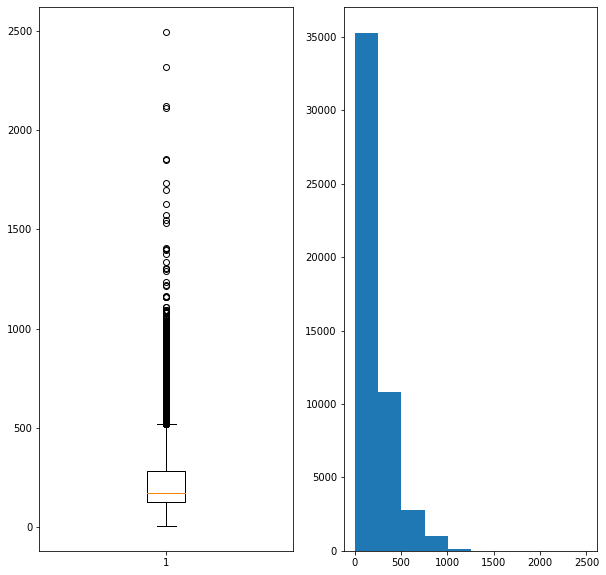

In [20]:
fig , axx = plt.subplots(1,2,figsize=(10,10))
plt.subplot(121)
plt.boxplot(d )
plt.subplot(122)
plt.hist(d)
plt.show()

## The average review has just under 300 words with a standard deviation of just over 200 words.

In [39]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
# we will choose only 5000 words

## Pad Sequence
We would then use the Keras utility to truncate or pad the dataset to a length of 500 for
each observation using the sequence.pad sequences() function.

In [26]:
from keras.preprocessing.sequence import    pad_sequences

The **pad_sequences** function transforms a list (of length num_samples) of sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps).
num_timesteps is either the maxlen argument if provided, or the length of the longest sequence in the list.

Sequences that are shorter than num_timesteps are padded with value until they are num_timesteps long.

Sequences longer than num_timesteps are truncated so that they fit the desired length.

In [28]:
sequence = [[1], [2, 3], [4, 5, 6]]
pad_sequences(sequence)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [40]:
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

**Embedding Layer**
https://stackoverflow.com/questions/42762849/keras-embedding-layers-how-do-they-work 
An embedding is a relatively low-dimensional space into which you can translate high-dimensional vectors

The Embedding layer in Keras (also in general) is a way to create dense word encoding. You should think of it as a matrix multiply by One-hot-encoding (OHE) matrix


`e = Embedding(1000, 64, input_length=50)`

1000 tells we plan to encode 1000 words in total. 64 tells we use 64 dimensional vector space. 50 tells input documents have 50 words each.

Embedding layers will fill up randomly with non-zero values and the parameters need to be learned.
We will do embedding in the first layer. The embedding layer will convert high dimension data to 32 dimensions

In [ ]:
Embedding(5000, 32, input_length=500)

# Base Model

In [34]:
max_words=500
top_words =5000
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


# All Steps together

In [4]:
# data processing and visualization libs

from keras.preprocessing.sequence import    pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
# Keras deep learning model libraries
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization , Conv2D ,MaxPool2D  ,Embedding
from tensorflow.keras.optimizers import SGD ,Adam

# import datasets
from keras.datasets import imdb 
# seed
seed=7
np.random.seed(seed)

#start
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# 500 Maximum words  sequences

X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

# base model
max_words=500
top_words =5000
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


# Traing and Evaluate Model

In [6]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,
verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 [==============================] - 23s 114ms/step - loss: 0.5523 - accuracy: 0.6758 - val_loss: 0.3122 - val_accuracy: 0.8680
Epoch 2/2
196/196 [==============================] - 22s 114ms/step - loss: 0.2024 - accuracy: 0.9211 - val_loss: 0.3085 - val_accuracy: 0.8717
Accuracy: 87.17%


# Using CNN Model

In [10]:
# seed
seed=7
np.random.seed(seed)

#start
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# 500 Maximum words  sequences

X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)


In [21]:
# base model
max_words=500
top_words =5000
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 498, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 249, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7968)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               1992250   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 2,155,605
Trainable params: 2,155,605
Non-trainable params: 0
___________________________________________

In [22]:
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=128,
verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/6
196/196 [==============================] - 26s 131ms/step - loss: 0.5263 - accuracy: 0.6848 - val_loss: 0.2872 - val_accuracy: 0.8795
Epoch 2/6
196/196 [==============================] - 26s 133ms/step - loss: 0.2340 - accuracy: 0.9078 - val_loss: 0.2689 - val_accuracy: 0.8866
Epoch 3/6
196/196 [==============================] - 26s 134ms/step - loss: 0.1725 - accuracy: 0.9341 - val_loss: 0.2815 - val_accuracy: 0.8861
Epoch 4/6
196/196 [==============================] - 26s 133ms/step - loss: 0.1259 - accuracy: 0.9550 - val_loss: 0.3261 - val_accuracy: 0.8775
Epoch 5/6
196/196 [==============================] - 26s 131ms/step - loss: 0.0734 - accuracy: 0.9788 - val_loss: 0.3683 - val_accuracy: 0.8757
Epoch 6/6
196/196 [==============================] - 26s 132ms/step - loss: 0.0316 - accuracy: 0.9938 - val_loss: 0.4602 - val_accuracy: 0.8727
Accuracy: 87.27%


In [23]:
history1=history.history
history1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [99]:
history1['loss']

[0.526251494884491,
 0.2340223491191864,
 0.17254240810871124,
 0.12585312128067017,
 0.07337652146816254,
 0.031603582203388214]

In [100]:
def result_summary(history,epochs):
  if type(history)!=dict:
    history1=history.history
  else:
    history1=history

  fig, axx =plt.subplots(2,figsize=(10,10))
  axx[0].set_title('Training and Validation Accuracy')
  axx[0].plot(range(0,epochs) ,history1['accuracy'] , color='green')
  axx[0].plot( range(0,epochs),history1['val_accuracy'] ,color='red')
 
  axx[1].set_title('Training and Validation loss')
  axx[1].plot(range(0,epochs),history1['loss']  ,color='green')
  axx[1].plot(range(0,epochs),history1['val_loss']   ,color='red')

  plt.show()




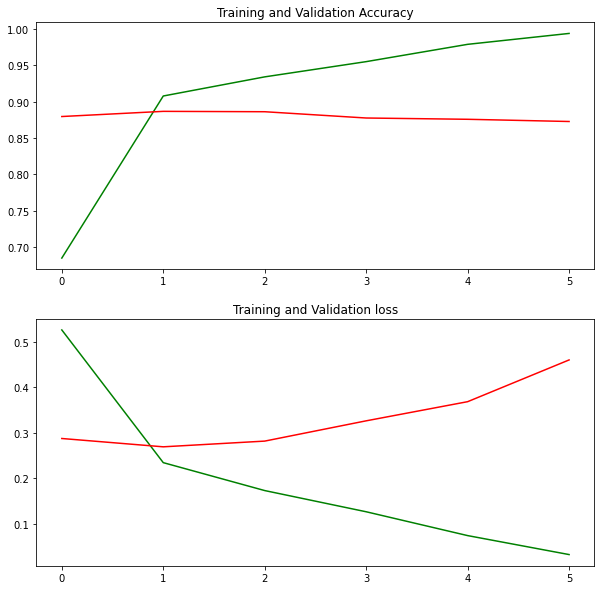

In [101]:
result_summary(history1,6)

# **saving**

In [102]:
# saving model
import os

path=os.getcwd()
model_path=path +'/digits_model1.h5'
# saving model
model.save(model_path,overwrite=True)

# saving model history 

import json
# # Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# **Loading History of Accuracy and Losses of the Model**

In [103]:
path=os.getcwd()
history_path=path +'/history_digits_model1.json'
history_loaded= json.load(open(history_path, 'r'))

### The loaded history is in String format.Converting it back to dictionary

In [104]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_loaded=ast.literal_eval(history_loaded)

# Summary from the loaded History

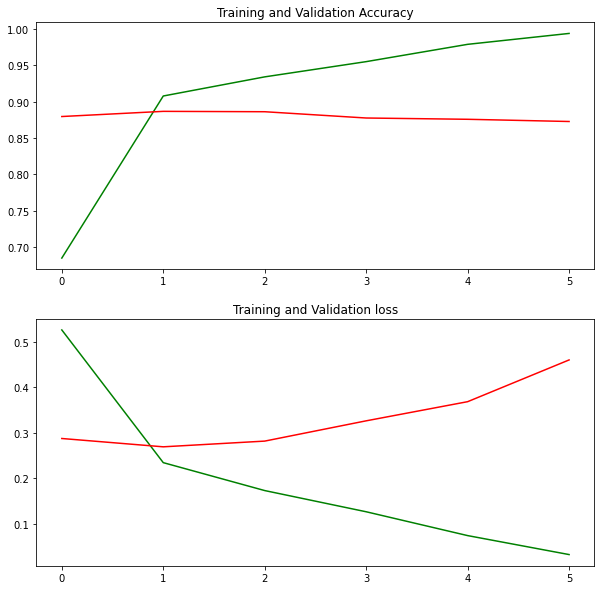

In [105]:
result_summary(history_loaded,6)

# **Results : Accuracy: 87.27%**